# Importing and Reading in CSVs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#We experemented with seaborn becasue we wanted to create graphs that we could manipulate with drop down menus. 
import seaborn as sns
#We imported widgets so that we could create drop down menus and a save button for our seaborne charts
from ipywidgets import interact, widgets
from IPython.display import display
from matplotlib.ticker import ScalarFormatter
#Some of the seaborn charts were outputting ugly depreciation warnings, so we added this purely for asthetic reasons
import warnings 
import os

#Establishing the ignore warnings function 
warnings.simplefilter(action='ignore', category=FutureWarning)

wine_production_path = "Resources/wine-production.csv"
global_temps_path = "Resources/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"

wine_production_data = pd.read_csv(wine_production_path)
global_temps_data = pd.read_csv(global_temps_path)


# Data Cleaning Stage 1 - Weather Data

In [2]:
#This data set was massive, and required a few rounds of cleaning.
 
#Cleaning up GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv
unique_countries_wine = wine_production_data['Entity'].unique()

#clean up global_temps_data and return only relevant years. 'dt' was the name of the date column.
global_temps_data['dt'] = pd.to_datetime(global_temps_data['dt'])
#We cut our weather data off at 1961 because that was the earliest date for our wine data.
#The years were also split by months, which is why we include the month and day.
global_temps_data_1961 = global_temps_data[global_temps_data['dt']>='1961-01-01']
#global_temps_data_1961

#Inserting a new column for 'Year'
global_temps_data_1961['Year'] = ""
#Our wine data set only had years date data, and we needed to find a way to extract just the years from our weather data
#ChatGPT helped us find the '.dt' and '.year' pandas accessors which enabled us extract just the year from the YYYY-MM-DD 
global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year

#We decided it would be best to conver the temperature data from celcius to farenheit
global_temps_data_1961['AverageTemperature'] = (global_temps_data_1961['AverageTemperature'] * 9/5) + 32

#Here, we are generating relevant stats from our filtered dataframe: global_temps_data_1961 
global_temps_grouped_mean = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].mean()
global_temps_grouped_median = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].median()
global_temps_grouped_max = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].max()
global_temps_grouped_min = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].min()
global_temps_grouped_std = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].std()

#With our relevant stats generated, we created a new dataframe to hold our new stats
global_temps = pd.DataFrame({
    "Average Temperature (F°)" : global_temps_grouped_mean,
    "Minimum Temperature (F°)" : global_temps_grouped_min,
    "Maximum Temperature (F°)" : global_temps_grouped_max,
    "Median Temperature (F°)" : global_temps_grouped_median,
    "Standard Deviation" : global_temps_grouped_std
})

#We also wrote it to a .csv to hold onto our work. 
global_temps.to_csv("Resources/global_temps.csv", index_label="Country")

global_temps



C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_43320\4229893727.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = ""
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_43320\4229893727.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_43320\4229893727.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Average Temperature (F°)  Minimum Temperature (F°)  \
Country     Year                                                       
Afghanistan 1961                  57.31685                   34.6676   
            1962                  56.78360                   33.1088   
            1963                  59.06015                   36.5000   
            1964                  55.55285                   24.3428   
            1965                  57.38330                   35.7746   
...                                    ...                       ...   
Åland       2009                  43.68035                   27.4208   
            2010                  40.75145                   20.4512   
            2011                  44.90735                   20.4980   
            2012                  42.91505                   25.7828   
            2013                  43.21355                   23.3978   

                  Maximum Temperature (F°)  Median Temperature (F°)  \
Country     Year                                                      
Afghanistan 1961                   81.2534                  54.9734   
            1962                   80.5298                  56.7563   
            1963                   81.0428                  60.2582   
            1964                   79.6460                  54.9059   
            1965                   80.1968                  58.1990   
...                                    ...                      ...   
Åland       2009                   61.5614                  42.0377   
            2010                   66.4142                  40.5590   
            2011                   64.4054                  45.4982   
            2012                   60.8900                  43.2572   
            2013                   61.6046                  42.8252   

                  Standard Deviation  
Country     Year                      
Afghanistan 1961           17.431491  
            1962           16.458718  
            1963           15.942641  
            1964           18.722815  
            1965           16.117239  
...                              ...  
Åland       2009           12.200169  
            2010           16.086607  
            2011           13.866469  
            2012           12.236111  
            2013           16.240937  

[12879 rows x 5 columns]

# Data Cleaning Stage 2 - Wine Data & Merge

In [3]:
#Sticking with imperial metrics, we converted tonnes to tons using a conversion equation provided to us by ChatGPT
wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] = (wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] * 0.90718474).round(2)

In [4]:
#Merging wine-production.csv with global_temps.csv by Country name and Year
merge_data = pd.merge(wine_production_data, global_temps, how="inner", left_on=["Entity",'Year'], right_on=["Country", 'Year'])

#We renamed some of the columns so that they would make more sense
merge_data.rename(columns={'': 'Sheet Index', 'Entity': 'Country','Year': 'Year', 'Wine | 00000564 || Production | 005510 || tonnes': 'Wine Production (tons)'}, inplace=True)
merge_data
#Generating a CSV for usage later
merge_data.to_csv("Resources/merge_data.csv", index_label="Country")


In [5]:
#After merging our wine data, we realized that we still had regional data (e.g. Africa, Asia, etc.). We wanted to seperate regions from the
#data set so that they wouldn't skew our country stats. We had originally inteded to create a seperate dataset for regions, but did not have the
#time. The major differentiator between the country data and regional data within the merge_data dataframe was that countries had a country code,
#whereas regions had no country code. Thus, to quickly seperate countries from regions, we simply generated a data frame that dropped all rows
#That had no data in the column 'Code' by using the .dropna function.

country_data_df = merge_data.dropna(subset=['Code'])
country_data_df.to_csv("Resources/country_data_df.csv", index_label="Country")
country_data_df

,Country,Code,Year,Wine Production (tons),Average Temperature (F°),Minimum Temperature (F°),Maximum Temperature (F°),Median Temperature (F°),Standard Deviation
53,Albania,ALB,1961,3229.58,55.97015,38.4458,71.9996,57.4232,12.240442
54,Albania,ALB,1962,4145.83,55.52375,37.1516,75.4592,55.6619,13.481548
55,Albania,ALB,1963,2078.36,55.55450,35.0384,73.7420,54.8222,13.397239
56,Albania,ALB,1964,2784.15,54.52760,33.8558,70.7504,55.0877,12.662470
57,Albania,ALB,1965,3643.25,54.28115,33.2618,73.1498,52.7630,12.910885
...,...,...,...,...,...,...,...,...,...
2976,Zimbabwe,ZWE,2009,1587.57,70.47905,59.4212,76.5158,72.4748,5.551294
2977,Zimbabwe,ZWE,2010,1587.57,71.57525,61.4786,78.6974,73.9472,6.000668
2978,Zimbabwe,ZWE,2011,1587.57,70.88435,60.4454,77.9378,73.2956,5.843389
2979,Zimbabwe,ZWE,2012,1587.57,70.73840,60.8864,76.2908,73.4819,5.532541


# Data Cleaning Stage 3 - Countries with Recent Wine Growth
***This data cleaning occured towards the end of the project

In [6]:
#Countries with top growth in wine production (this cleaning occured towards the end of the project)

recent_period_end = country_data_df['Year'].max()
recent_period_start = recent_period_end - 33  # Last 10 years as the recent period

# Splitting the country_data_df into two periods
earlier_data = country_data_df[country_data_df['Year'] <= recent_period_start]
recent_data = country_data_df[country_data_df['Year'] > recent_period_start]

# Calculating the average production in earlier and recent periods for each country
earlier_avg_production = earlier_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Earlier Average Production')
recent_avg_production = recent_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Recent Average Production')

# Merging the two datasets
merged_production_periods = pd.merge(earlier_avg_production, recent_avg_production, on='Country')

# Calculating the growth rate
merged_production_periods['Growth Rate %'] = ((merged_production_periods['Recent Average Production'] - merged_production_periods['Earlier Average Production']) / merged_production_periods['Earlier Average Production']) * 100

# Identifying countries with a sharp increase in wine production
sharp_increase_countries = merged_production_periods[merged_production_periods['Growth Rate %'] > 0].sort_values(by='Growth Rate %', ascending=False)
sharp_increase_countries.to_csv("Resources/sharp_increase_countries.csv", index_label="original_index")
sharp_increase_countries.head(10)

,Country,Earlier Average Production,Recent Average Production,Growth Rate %
10,China,3.779936e+04,7.691458e+05,1934.811390
26,New Zealand,1.927110e+04,8.116131e+04,321.155588
20,Lebanon,3.610592e+03,1.350186e+04,273.951536
5,Bolivia,9.521825e+02,3.418131e+03,258.978516
41,Zimbabwe,4.147129e+02,1.336365e+03,222.238733
29,Peru,8.255381e+03,2.565824e+04,210.806182
19,Japan,2.128165e+04,6.571468e+04,208.785663
3,Australia,2.360077e+05,7.118970e+05,201.641359
22,Madagascar,3.053267e+03,6.276894e+03,105.579619
39,United States,1.044319e+06,1.979175e+06,89.518130


In [7]:
#Towards the end of our project, after we had already spent time generating our graphs, we realized that we needed some sort of statistical
#reasoning behind our choice of countries to present. 
from scipy.stats import pearsonr
import numpy as np

# Preprocessing the data to focus on relevant columns
data_relevant = country_data_df[['Country', 'Year', 'Wine Production (tons)', 'Average Temperature (F°)']]

# Grouping the data by country
grouped_data = data_relevant.groupby('Country')

# Collecting data in a list of dictionaries instead of using DataFrame.append
results_list = []

# Calculating r-values and p-values for each country
for country, group in grouped_data:
    # Calculating the r-value and p-value for average temperature over time
    r_value_temp_time, p_value_temp_time = pearsonr(group['Year'], group['Average Temperature (F°)'])

    # Handling cases where wine production data might have NaN values
    if group['Wine Production (tons)'].isna().any():
        r_value_wine_temp = np.nan
        p_value_wine_temp = np.nan
        r_value_wine_time = np.nan
        p_value_wine_time = np.nan
    else:
        # Calculating the r-value and p-value for wine production and average temperature
        r_value_wine_temp, p_value_wine_temp = pearsonr(group['Wine Production (tons)'], group['Average Temperature (F°)'])
        # Calculating the r-value and p-value for wine production over time
        r_value_wine_time, p_value_wine_time = pearsonr(group['Wine Production (tons)'], group['Year'])

    # Appending the results to the list
    results_list.append({
        'Country': country,
        'Avg Temp over Time r-value': r_value_temp_time,
        'Avg Temp over Time p-value': p_value_temp_time,
        'Wine Production & Avg Temp r-value': r_value_wine_temp,
        'Wine Production & Avg Temp p-value': p_value_wine_temp,
        'Wine Production over Time r-value': r_value_wine_time,
        'Wine Production over Time p-value': p_value_wine_time
    })

# Creating a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)
results_df.to_csv("Resources/country_r_p_values.csv", index_label="original_index")
results_df.head()

c:\Users\Andrew Koller\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Country,Avg Temp over Time r-value,Avg Temp over Time p-value,Wine Production & Avg Temp r-value,Wine Production & Avg Temp p-value,Wine Production over Time r-value,Wine Production over Time p-value
0,Albania,0.634010,3.458857e-07,0.003801,0.978449,0.406040,2.555849e-03
1,Algeria,0.765804,2.385717e-11,-0.516540,0.000075,-0.825537,2.847141e-14
2,Argentina,0.422380,1.629834e-03,-0.365813,0.007066,-0.654926,1.035425e-07
3,Armenia,0.588167,3.988474e-03,-0.699961,0.000287,-0.610042,2.572436e-03
4,Australia,0.516950,7.395258e-05,0.479279,0.000282,0.906228,1.045495e-20


In [8]:
file_path_r_p_values = 'Resources/country_r_p_values.csv'
r_p_values_df = pd.read_csv(file_path_r_p_values)

def filter_significant_countries(df, r_value_threshold=0.3):
   
    # Filtering criteria: absolute r-value > threshold and p-value < 0.05
    significant_df = df[
        (df['Wine Production over Time r-value'].abs() > r_value_threshold) &
        (df['Wine Production & Avg Temp r-value'].abs() > r_value_threshold) &
        (df['Avg Temp over Time r-value'].abs() > r_value_threshold) &
        (df['Wine Production over Time p-value'] < 0.05)&
        (df['Wine Production & Avg Temp p-value'] < 0.05) &
        (df['Avg Temp over Time p-value'] < 0.05) 
        
        
    ]
    return significant_df

# Using the function to filter the DataFrame
significant_countries_df = filter_significant_countries(r_p_values_df)
significant_countries_df.to_csv("Resources/significant_countries.csv", index_label="original_index")
significant_countries_df.head(50)

,original_index,Country,Avg Temp over Time r-value,Avg Temp over Time p-value,Wine Production & Avg Temp r-value,Wine Production & Avg Temp p-value,Wine Production over Time r-value,Wine Production over Time p-value
1,1,Algeria,0.765804,2.385717e-11,-0.516540,7.510252e-05,-0.825537,2.847141e-14
2,2,Argentina,0.422380,1.629834e-03,-0.365813,7.065939e-03,-0.654926,1.035425e-07
3,3,Armenia,0.588167,3.988474e-03,-0.699961,2.873322e-04,-0.610042,2.572436e-03
4,4,Australia,0.516950,7.395258e-05,0.479279,2.824622e-04,0.906228,1.045495e-20
6,6,Azerbaijan,0.638047,1.398305e-03,-0.593077,3.624180e-03,-0.496992,1.861708e-02
10,10,Brazil,0.751851,8.672369e-11,0.415872,1.954893e-03,0.715581,1.726972e-09
11,11,Bulgaria,0.563176,1.132950e-05,-0.608898,1.313375e-06,-0.761972,3.430420e-11
12,12,Canada,0.646235,1.728312e-07,0.403027,2.770223e-03,0.479560,2.798094e-04
14,14,China,0.660454,1.169096e-05,0.672636,6.998109e-06,0.985579,8.049784e-28
19,19,Egypt,0.634768,3.316095e-07,0.423867,1.562740e-03,0.428124,1.384001e-03


In [9]:
#Merging statistically significant data with sharp increase data
file_path_growth_data = 'Resources/sharp_increase_countries.csv'
growth_data_df = pd.read_csv(file_path_growth_data)

# Merging the significant countries DataFrame with the growth data DataFrame
merged_df = significant_countries_df.merge(growth_data_df, on='Country', how='inner')

# Displaying the first few rows of the merged DataFrame
merged_df.head(50)

,original_index_x,Country,Avg Temp over Time r-value,Avg Temp over Time p-value,Wine Production & Avg Temp r-value,Wine Production & Avg Temp p-value,Wine Production over Time r-value,Wine Production over Time p-value,original_index_y,Earlier Average Production,Recent Average Production,Growth Rate %
0,4,Australia,0.516950,7.395258e-05,0.479279,2.824622e-04,0.906228,1.045495e-20,3,2.360077e+05,7.118970e+05,201.641359
1,10,Brazil,0.751851,8.672369e-11,0.415872,1.954893e-03,0.715581,1.726972e-09,6,1.765974e+05,2.654489e+05,50.313003
2,12,Canada,0.646235,1.728312e-07,0.403027,2.770223e-03,0.479560,2.798094e-04,8,3.412619e+04,4.122687e+04,20.807133
3,14,China,0.660454,1.169096e-05,0.672636,6.998109e-06,0.985579,8.049784e-28,10,3.779936e+04,7.691458e+05,1934.811390
4,19,Egypt,0.634768,3.316095e-07,0.423867,1.562740e-03,0.428124,1.384001e-03,12,2.783697e+03,3.664394e+03,31.637696
5,24,Germany,0.582011,4.851426e-06,0.489154,2.017738e-04,0.423626,1.573447e-03,14,6.475496e+05,9.021444e+05,39.316643
6,29,Japan,0.540058,2.996688e-05,0.522427,6.005261e-05,0.882033,2.698343e-18,19,2.128165e+04,6.571468e+04,208.785663
7,34,Lebanon,0.544691,2.480078e-05,0.301678,2.814157e-02,0.715646,1.718568e-09,20,3.610592e+03,1.350186e+04,273.951536
8,38,Madagascar,0.726527,7.361250e-10,0.460039,5.286993e-04,0.718340,1.398287e-09,22,3.053267e+03,6.276894e+03,105.579619
9,56,South Africa,0.474683,3.291938e-04,0.394676,3.449989e-03,0.927333,2.032333e-23,33,4.458025e+05,7.457747e+05,67.288144


# Plotting Stage

In [10]:
#Wine production over time 
def plot_wine_production(country):
    """ Plots the wine production over years for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]
        
        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(data['Year'], data['Wine Production (tons)'], marker='o')
        plt.title(f'Wine Production Over Time in {country}')
        plt.xlabel('Year')
        plt.ylabel('Wine Production (tons)')
        plt.grid(True)
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

# Link the dropdown to the plotting function
widgets.interactive(plot_wine_production, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [11]:
current_country = None
current_start_year = None

def plot_country_data(country, start_year):
    global fig, current_country, current_start_year
    current_country = country
    current_start_year = start_year
    """ Plots wine production and average temperature over years for a selected country. """
    if country:
        # Filter data for the selected country
        country_data = country_data_df[(country_data_df['Country'] == country) & (country_data_df['Year']>= start_year)]

        # Creating figure and first y-axis for wine production
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.plot(country_data['Year'], country_data['Wine Production (tons)'], color='tab:blue', marker='o')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Wine Production (tons)', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Creating second y-axis for temperature
        ax2 = ax1.twinx()
        ax2.plot(country_data['Year'], country_data['Average Temperature (F°)'], color='tab:red', linestyle='--')
        ax2.set_ylabel('Average Temperature (F°)', color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')

        # Adding title and showing the plot
        plt.title(f'Wine Production and Average Temperature in {country} Over Time from {start_year}')
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)
#Creating a dropdown for year selection
years = sorted(country_data_df['Year'].unique())
year_dropdown = widgets.Dropdown(
    options=[('Select a year', None)] + [(year, year) for year in years],
    value=None,
    description='Start Year:',
)

def save_plot(b):
    try:
        fig.savefig(f"wine_prod_avg_temp_{current_country}_{current_start_year}_plot.png")
        print("Plot saved as 'wine_prod_avg_temp_{}_{}_plot.png'.".format(current_country, current_start_year))
    except NameError:
        print("No plot to save. Please generate a plot first.")
save_button = widgets.Button(description="Save Chart")
# Link the dropdown to the plotting function
save_button.on_click(save_plot)
display(save_button)
widgets.interactive(plot_country_data, country=country_dropdown, start_year=year_dropdown)

Button(description='Save Chart', style=ButtonStyle())

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [12]:
#Average Temperature over Time Graph

current_country = None
current_start_year = None

def plot_average_temp(country, start_year):
    global fig, current_country, current_start_year
    current_country = country
    current_start_year = start_year
    """ Plots wine production and average temperature over years for a selected country. """
    if country:
        # Filter data for the selected country
        data = country_data_df[(country_data_df['Country'] == country) & (country_data_df['Year']>= start_year)] 
        
        # Create a Matplotlib figure and axes
        fig, ax = plt.subplots(figsize=(12, 6))

        # Scatter plot on the created axes
        ax.scatter(data['Year'], data['Average Temperature (F°)'], color='tab:red') 

        # Linear regression plot on the same axes
        slope, intercept, r_value, p_value, std_err = st.linregress(data['Year'], data['Average Temperature (F°)'])
        sns.regplot(x='Year', y='Average Temperature (F°)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}', ax=ax)
        
        # Set title and labels
        ax.set_title(f'Average Temperature (F°) Over Time in {country}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Temperature (F°)')
        ax.annotate(f'r-value = {r_value:.4f}', xy=(data['Year'].min(), data['Average Temperature (F°)'].min()), fontsize=15, color="red") 
        ax.grid(True)
        
        plt.title(f'Average Temperature of {country} Over Time from {start_year}')
        plt.show()
    else:
        print("Please select a country.")

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)
# Creating a dropdown for country selection
years = sorted(country_data_df['Year'].unique())
year_dropdown = widgets.Dropdown(
    options=[('Select a year', None)] + [(year, year) for year in years],
    value=None,
    description='Start Year:',
)
def save_plot(b):
    global fig, current_country, current_start_year
    try:
        fig.savefig(f"avg_temp_{current_country}_{current_start_year}_plot.png")
        print("Plot saved as 'avg_temp_{}_{}_plot.png'.".format(current_country, current_start_year))
    except NameError:
        print("No plot to save. Please generate a plot first.")
save_button = widgets.Button(description="Save Chart")
# Link the dropdown to the plotting function
save_button.on_click(save_plot)
display(save_button)

widgets.interactive(plot_average_temp, country=country_dropdown, start_year=year_dropdown)
#WHY DOUBLE GRAPH?

Button(description='Save Chart', style=ButtonStyle())

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

In [13]:
#Average Temperature vs. Wine Production Graph
current_country = None

def categorize_by_decade(year):
    """Assigns a decade group label based on the year."""
    if year < 1970:
        return "1970 and before"
    elif year < 1980:
        return "1970-1979"
    elif year < 1990:
        return "1980-1989"
    elif year < 2000:
        return "1990-1999"
    elif year < 2010:
        return "2000-2001"
    elif year < 2020:
        return "2011-2019"
    # Add additional conditions for other decades up to 2020
    else:
        return "2020 and after"

country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)

def plot_scatter_and_regression(country):
    global fig, current_country
    current_country = country
    if country:
        # Filter data for the selected country
        data = country_data_df[country_data_df['Country'] == country]

        # Scatterplot
        fig = plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, hue='Decade Group', palette='Spectral_r')

        # Regression line
        slope, intercept, r_value, p_value, std_err = st.linregress(data['Average Temperature (F°)'], data['Wine Production (tons)'])
        sns.regplot(x='Average Temperature (F°)', y='Wine Production (tons)', data=data, scatter=False, label=f'y={slope:.2f}x+{intercept:.2f}')

        # Adding labels and title
        plt.xlabel('Average Temperature (F°)')
        plt.ylabel('Wine Production (tons)')
        plt.title(f'Average Temperature vs. Wine Production in {country}\n'
                  f"r-value = {round(r_value,4)}\np-value = {round(p_value,4)}")
        plt.legend()
        plt.annotate(f'r-value = {r_value}',(10000,58),fontsize=15,color="red")
        plt.show()
        global saved_figure
        saved_figure = fig

# Creating a dropdown for country selection
countries = country_data_df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=[('Select a country', None)] + [(country, country) for country in countries],
    value=None,
    description='Country:',
)

def save_plot(b):
    try:
        saved_figure.savefig(f"avg_temp_vs_wine_prod_{current_country}_plot.png")
        print("Plot saved as 'avg_temp_vs_wine_prod_{}_plot.png'.".format(current_country,))
    except NameError:
        print("No plot to save. Please generate a plot first.")
save_button = widgets.Button(description="Save Chart")
# Link the dropdown to the plotting function
save_button.on_click(save_plot)
display(save_button)

# Link the dropdown to the plotting function
widgets.interactive(plot_scatter_and_regression, country=country_dropdown)


C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_43320\2679991178.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data_df['Decade Group'] = country_data_df['Year'].apply(categorize_by_decade)


Button(description='Save Chart', style=ButtonStyle())

interactive(children=(Dropdown(description='Country:', options=(('Select a country', None), ('Albania', 'Alban…

The r-value is: -0.10648044360881316
The p-value is: 3.63078077284043e-08


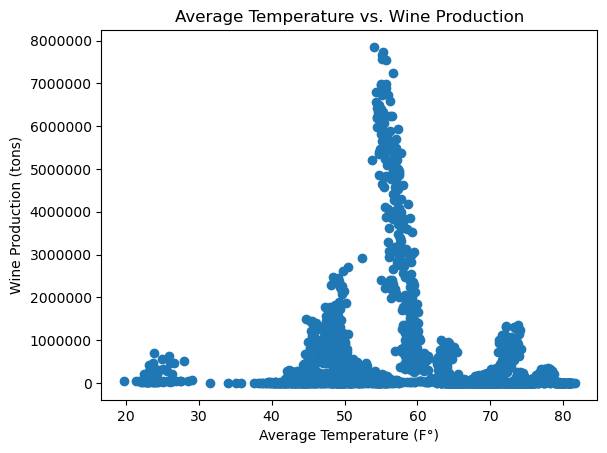

In [14]:
x = country_data_df['Average Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Average Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Average Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.12595200249204538
The p-value is: 6.909953886861863e-11


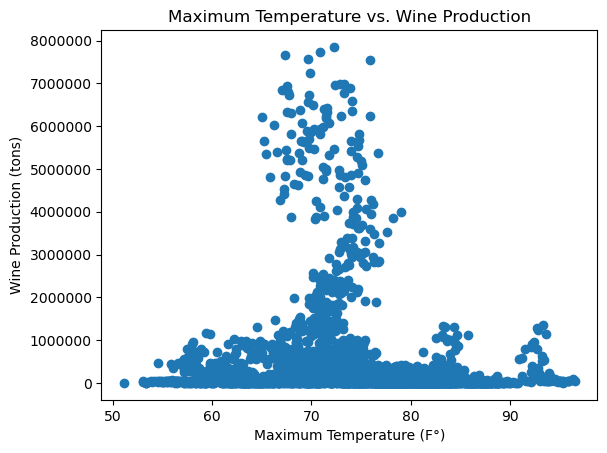

In [15]:
x = country_data_df['Maximum Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Maximum Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Maximum Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

The r-value is: -0.12907735718286148
The p-value is: 2.2966644884940787e-11


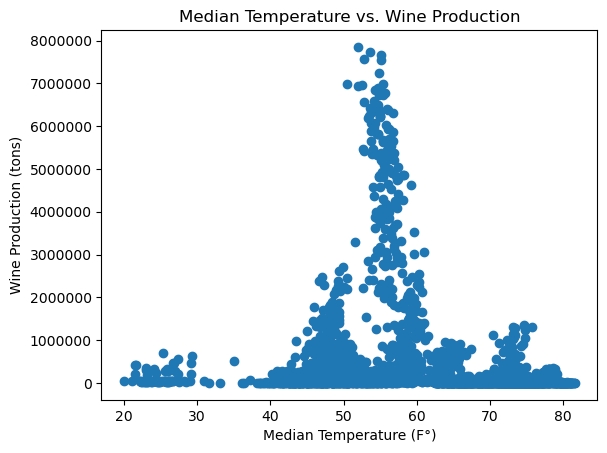

In [16]:
x = country_data_df['Median Temperature (F°)']
y = country_data_df['Wine Production (tons)']

plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.xlabel('Median Temperature (F°)')
plt.ylabel('Wine Production (tons)')
plt.title(f'Median Temperature vs. Wine Production')


plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='both')

print(f'The r-value is: {rvalue}')
print(f'The p-value is: {pvalue}')

plt.show()

In [17]:
#Countries with decline wine production
recent_period_end = country_data_df['Year'].max()
recent_period_start = recent_period_end - 33  # Last 30 years as the recent period

# Splitting the country_data_df into two periods
earlier_data = country_data_df[country_data_df['Year'] <= recent_period_start]
recent_data = country_data_df[country_data_df['Year'] > recent_period_start]

# Calculating the average production in earlier and recent periods for each country
earlier_avg_production = earlier_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Earlier Average Production')
recent_avg_production = recent_data.groupby('Country')['Wine Production (tons)'].mean().reset_index(name='Recent Average Production')

# Merging the two datasets
merged_production_periods = pd.merge(earlier_avg_production, recent_avg_production, on='Country')

# Calculating the growth rate
merged_production_periods['Growth Rate %'] = ((merged_production_periods['Recent Average Production'] - merged_production_periods['Earlier Average Production']) / merged_production_periods['Earlier Average Production']) * 100

# Identifying countries with a sharp increase in wine production
sharp_increase_countries = merged_production_periods[merged_production_periods['Growth Rate %'] > 0].sort_values(by='Growth Rate %', ascending=False)
sharp_increase_countries.to_csv("Resources/sharp_increase_countries.csv", index_label="original_index")
sharp_increase_countries.head(10)

,Country,Earlier Average Production,Recent Average Production,Growth Rate %
10,China,3.779936e+04,7.691458e+05,1934.811390
26,New Zealand,1.927110e+04,8.116131e+04,321.155588
20,Lebanon,3.610592e+03,1.350186e+04,273.951536
5,Bolivia,9.521825e+02,3.418131e+03,258.978516
41,Zimbabwe,4.147129e+02,1.336365e+03,222.238733
29,Peru,8.255381e+03,2.565824e+04,210.806182
19,Japan,2.128165e+04,6.571468e+04,208.785663
3,Australia,2.360077e+05,7.118970e+05,201.641359
22,Madagascar,3.053267e+03,6.276894e+03,105.579619
39,United States,1.044319e+06,1.979175e+06,89.518130


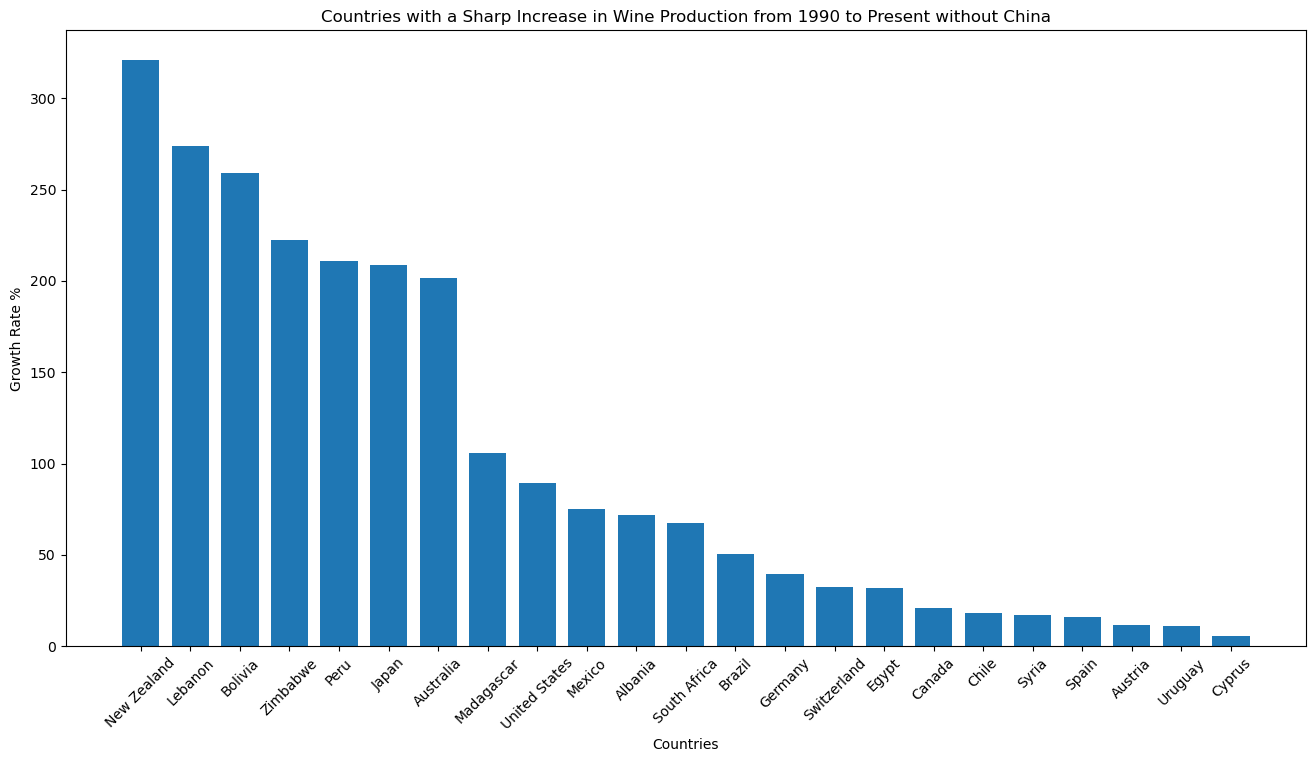

In [18]:
#Removing outlier
sharp_increase_countries_sliced = sharp_increase_countries[1:]

x = sharp_increase_countries_sliced['Country']
y = sharp_increase_countries_sliced['Growth Rate %']

plt.figure(figsize = (16,8))
plt.bar(x, y, align="center", width = .75)
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Growth Rate %')
plt.title(f'Countries with a Sharp Increase in Wine Production from 1990 to Present without China')

plt.show()